## Projeto Milk Temperature

### Objective:
- In this project we are going to the investigative phase of Milk_Diagnostic (a device for collecting and sending milk data on the farm via SMS), we are going to carry out a survey of the variation in milk temperature over a given period. Here we will make a prediction of these temperatures, using reinforcement learning for the next few minutes to alert both the producer and the collecting company about a possible spike in the temperature of the milk stored on the farm, before the event happens.

- Nesse projeto vamos para a fase investigatória do Milk_Diagnostic (aparelho de coleta e envio de dados do leite na fazenda via sms), vamos fazer um levantamento da variação da temperatura do leite em determinado período. Aqui vamos fazer uma predição dessas temperaturas, utilizando aprendizado por reforço para os próximos minutos para alertar tanto o produtor quanto a empresa captadora sobre um possível pico da temperatura do leite armazenado na fazenda, antes que o evento aconteça.

### Data Origin:
- Dataset: MILK_temperature.TXT

- Through the Milk_Diagnostic equipment (device for collecting and sending milk data on the farm via SMS) data on milk temperature, ambient temperature, date, time, humidity, geographic coordinates, are transferred daily from the farm's milk reservoir every 10 minutes (configurable), 24 hours a day, 7 days a week.

- Através do equipamento Milk_Diagnostic (aparelho de coleta e envio de dados do leite na fazenda via sms)os dados de temperatura do leite, temperatura ambiente, data, hora, umidade, coordenadas geográficas, são transferidos diariamente do reservatório de leite da fazenda a cada 10 minutos (configurável), 24 horas por dia durante os 7 dias da semana.

Aqui está o que as colunas representam:

    local: identificador da fazendo origem do leite
    data: data da coleta da temperatura
    hora: hora, minutos e segundos da coleta da temperatura
    lat: latitude do local da fazenda
    long: longitude do local da fazenda
    umidade: umidade ambiente do local do tanque de leite
    t_ex: temperatura ambiente do local do tanque de leite
    t1, t2, t3, t4, t5, t6, t7, t8: 
        temperaturas coletadas dentro do intervalo configurado para envio (10 minutos para esse trabalho)


- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [107]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [108]:
# preparação e visualização de dados
from matplotlib import pyplot as plt # plotagem gráfica

In [109]:
# Lendo dados de cotação da soja baixados em arquivos
# juntando os anos de cotação
# para uma atualização em 'tempo real' da cotação da bolsa podemos utilizar o quandl da Nasdaq já mencionado anteriormente

df_milk = pd.read_csv('dataset/MILK_temperature.csv', sep='p')

In [110]:
# verificando a quantidade de linhas e colunas do dataframe
df_milk.shape

(14327, 16)

In [111]:
# verificando as primeiras linhas de dados
df_milk.head(3)

,local,data,hora,lat,long,umidade,t_ex,t1,t2,t3,t4,t5,t6,t7,t8,Unnamed: 15
0,1,0/ 0/2000,6:36:19,-18.918142,-48.230560,67.000000,26.799999,NAN,10.7400,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,0/ 0/2000,8:14:46,-18.918184,-48.230553,53.000000,26.700001,NAN,25.0525,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1,0/ 0/2000,8:34:31,-18.918177,-48.230583,44.000000,26.600000,NAN,24.1150,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [112]:
# eliminando a última coluna 
colunas = list(df_milk.columns)

df_milk = df_milk[colunas[:15]]

In [113]:
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14327 entries, 0 to 14326
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   local    14327 non-null  int64  
 1   data     14327 non-null  object 
 2   hora     14327 non-null  object 
 3   lat      14327 non-null  float64
 4   long     14327 non-null  float64
 5   umidade  14327 non-null  object 
 6   t_ex     14327 non-null  object 
 7   t1       14327 non-null  object 
 8   t2       14327 non-null  float64
 9   t3       14327 non-null  float64
 10  t4       14327 non-null  float64
 11  t5       14327 non-null  float64
 12  t6       14327 non-null  float64
 13  t7       14327 non-null  float64
 14  t8       14327 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 1.6+ MB


In [114]:
# reconhecendo as primeiras linhas do dataframe
df_milk.data.unique()

array([' 0/ 0/2000', ' 1/ 8/2023', ' 1/ 9/2023', ' 1/10/2023',
       ' 1/11/2023', ' 2/ 8/2023', ' 2/10/2023', ' 2/11/2023',
       ' 3/ 8/2023', ' 3/10/2023', ' 3/11/2023', ' 4/ 8/2023',
       ' 4/ 9/2023', ' 4/10/2023', ' 4/11/2023', ' 5/ 8/2023',
       ' 5/10/2023', ' 5/11/2023', ' 5/12/2023', ' 6/ 8/2023',
       ' 6/10/2023', ' 6/11/2023', ' 7/ 8/2023', ' 7/10/2023',
       ' 7/11/2023', ' 8/ 9/2023', ' 8/10/2023', ' 8/11/2023',
       ' 9/ 8/2023', ' 9/ 9/2023', ' 9/10/2023', ' 9/11/2023',
       ' 9/12/2023', '10/ 9/2023', '10/10/2023', '10/11/2023',
       '11/ 8/2023', '11/ 9/2023', '11/10/2023', '12/ 9/2023',
       '12/10/2023', '13/ 7/2023', '13/ 8/2023', '13/ 9/2023',
       '13/10/2023', '14/ 7/2023', '14/ 8/2023', '14/ 9/2023',
       '14/10/2023', '15/ 7/2023', '15/ 8/2023', '15/ 9/2023',
       '15/10/2023', '16/ 7/2023', '16/ 9/2023', '16/10/2023',
       '17/ 7/2023', '17/ 9/2023', '17/10/2023', '18/ 7/2023',
       '18/ 9/2023', '18/10/2023', '19/ 7/2023', '19/ 9

In [115]:
# eliminando data inválida
df_remove = df_milk.loc[(df_milk['data'] == ' 0/ 0/2000')]
df_milk = df_milk.drop(df_remove.index)

In [116]:
# troca espaços por zero na data
def substitui_espacos_data(data): 
    return data.replace(' ', '0')

In [117]:
# troca espaços por zero na hora e modifica hora inválida para 00:00:59
def substitui_espacos_hora(hora): 
    hora = hora.replace(' ', '0')
    
    if hora[3] == ':':
        hora = '0' + hora[2:]

    return hora

In [118]:
df_milk['data'] = df_milk['data'].apply(substitui_espacos_data)
df_milk['hora'] = df_milk['hora'].apply(substitui_espacos_hora)

In [119]:
df_milk['data_hora'] = df_milk['data'] + ' ' + df_milk['hora']

In [120]:
# convertendo o tipo de dados da variável
df_milk['t1'] = df_milk['t1'].astype('float64')
df_milk['umidade'] = df_milk['umidade'].astype('float64')
df_milk['t_ex'] = df_milk['t_ex'].astype('float64')
df_milk['data_hora'] = df_milk['data_hora'].astype('datetime64[ns]')

In [121]:
# eliminando dados inválidos
df_remove = df_milk.loc[(df_milk['t_ex'] < 0.1) | 
                        (df_milk['t1'] < 0.1) | 
                        (df_milk['t2'] < 0.1) | 
                        (df_milk['t3'] < 0.1) | 
                        (df_milk['t4'] < 0.1) | 
                        (df_milk['t5'] < 0.1) | 
                        (df_milk['t6'] < 0.1) | 
                        (df_milk['t7'] < 0.1) | 
                        (df_milk['t8'] < 0.1) | 
                        (df_milk['umidade'] < 0.1)
                        ]
df_milk = df_milk.drop(df_remove.index)

In [122]:
# verificando a existência de nulos
df_milk.isnull().value_counts()

local  data   hora   lat    long   umidade  t_ex   t1     t2     t3     t4     t5     t6     t7     t8     data_hora
False  False  False  False  False  False    False  False  False  False  False  False  False  False  False  False        13880
                                                   True   False  False  False  False  False  False  False  False            7
Name: count, dtype: int64

In [123]:
# verificando redefinição do tipo de dado da variável(coluna) Date
# reconhecendo as variáveis disponíveis
# verificando se há dados nulos
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13887 entries, 11 to 14326
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   local      13887 non-null  int64         
 1   data       13887 non-null  object        
 2   hora       13887 non-null  object        
 3   lat        13887 non-null  float64       
 4   long       13887 non-null  float64       
 5   umidade    13887 non-null  float64       
 6   t_ex       13887 non-null  float64       
 7   t1         13880 non-null  float64       
 8   t2         13887 non-null  float64       
 9   t3         13887 non-null  float64       
 10  t4         13887 non-null  float64       
 11  t5         13887 non-null  float64       
 12  t6         13887 non-null  float64       
 13  t7         13887 non-null  float64       
 14  t8         13887 non-null  float64       
 15  data_hora  13887 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(12), int64(1),

In [124]:
# confirmando a inexistência de nulos
df_milk.isnull().sum()

local        0
data         0
hora         0
lat          0
long         0
umidade      0
t_ex         0
t1           7
t2           0
t3           0
t4           0
t5           0
t6           0
t7           0
t8           0
data_hora    0
dtype: int64

In [125]:
# apagando linhas com nulos
df_milk = df_milk.dropna()

In [126]:
# verificando se existe registros duplicados
df_milk.duplicated().sum()

3

In [127]:
# apagando linhas duplicadas
df_milk = df_milk.drop_duplicates()

In [128]:
df_milk.shape

(13877, 16)

In [129]:
# apura a média
df_milk['temp'] = (df_milk['t1'] + df_milk['t2'] + df_milk['t3'] + df_milk['t4'] + \
                   df_milk['t5'] + df_milk['t6'] + df_milk['t7'] + df_milk['t8']) / 8 

In [130]:
df_milk[['temp', 't_ex', 'umidade']].head(10)

,temp,t_ex,umidade
11,24.423272,25.892607,47.418488
12,24.360077,25.869171,47.540405
13,24.278691,25.812103,47.464645
14,24.210923,25.660603,47.419193
15,24.170970,25.644939,47.535355
16,24.111838,25.609079,47.424244
17,24.066316,25.467169,47.166668
18,23.982315,25.413635,47.176769
19,23.893088,25.347979,47.060608
20,23.914008,25.316149,47.257576


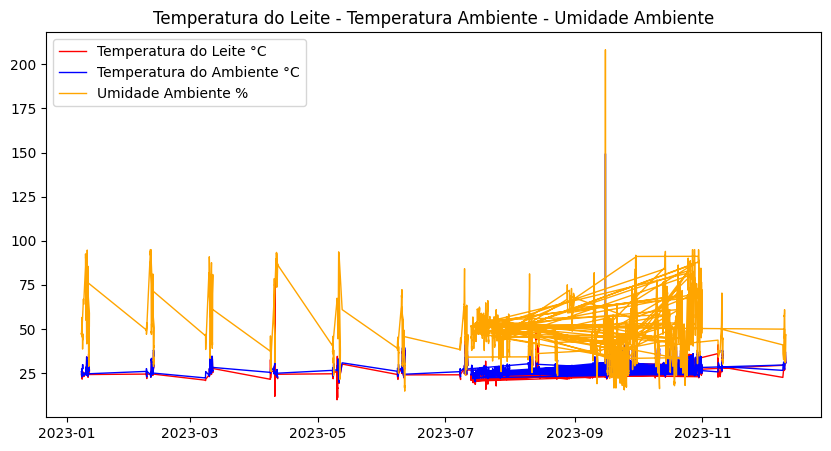

In [134]:
# plotando a evolução de algumas valores mais importantes na transação de títulos (contratos) por ano
# obs: média anual dos valores
fig,ax = plt.subplots(ncols=1,figsize=(10,5))

plt.plot(df_milk.data_hora, df_milk.temp, label = "Temperatura do Leite °C", linewidth=1, color='red') 
plt.plot(df_milk.data_hora, df_milk.t_ex, label = "Temperatura do Ambiente °C", linewidth=1, color='blue') 
plt.plot(df_milk.data_hora, df_milk.umidade, label = "Umidade Ambiente %", linewidth=1, color='orange')  

plt.title('Temperatura do Leite - Temperatura Ambiente - Umidade Ambiente')
plt.legend() 

plt.savefig('grafic_image/Dados_leite_fazenda.png', format='png')
plt.show()

Observamos que a média dos valores de fechamento, nro de títulos negociados e fluxo de valores transacionados de 1999 a 2020 tiveram um crescimento mais uniforme, tendo uma alta mais brusca de 2020 a 2021.
*Obs: o preço médio de fechamento foi multiplicado por 10 para fins de facilitar a comparação da curva da evolução dos valores com as demais curvas.

In [132]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_milk.sort_index().to_csv('df_treated/df_milk_temperature_treated.csv', index=False)